In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os


In [ ]:
print(os.listdir("/content/drive/MyDrive/Kidney Cancer"))

['Tumor', 'Normal']


In [ ]:
DATADIR = "/content/drive/MyDrive/Kidney Cancer"

CATEGORIES = ["Normal","Tumor"]

In [ ]:
IMG_SIZE = 100

In [ ]:
all_data =[]

def create_all_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                all_data.append([new_array,class_num])
            except Exception as e:
                pass
create_all_data()

In [ ]:
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  10000


In [ ]:
X = []
y = []

for categories, label in all_data:
  X.append(categories)
  y.append(label)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(5850, 100, 100, 3)
(3500, 100, 100, 3)
(650, 100, 100, 3)
(5850,)
(3500,)
(650,)


In [ ]:
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [ ]:

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=3)
]

In [ ]:
history = model.fit(x_train, train_yCl,
                    batch_size=64,
                    validation_data = (x_val, valid_yCl),
                    callbacks = callback_list,
                    epochs = 50
                    )

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.8974
Epoch 1: val_accuracy improved from -inf to 0.67692, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 838s 9s/step - loss: 0.6727 - accuracy: 0.8974 - val_loss: 1.0667 - val_accuracy: 0.6769
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9850
Epoch 2: val_accuracy improved from 0.67692 to 0.78154, saving model to model.h5
92/92 [==============================] - 841s 9s/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.7598 - val_accuracy: 0.7815
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9901
Epoch 3: val_accuracy improved from 0.78154 to 0.98769, saving model to model.h5
92/92 [==============================] - 846s 9s/step - loss: 0.0344 - accuracy: 0.9901 - val_loss: 0.0265 - val_accuracy: 0.9877
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9928
Epoch 4: val_accuracy did not improve from 0.98769
92/92 [==============================] - 834s 9s/step - loss: 0.0271 - accuracy: 0.9928 - val_loss: 1.1536 - val_ac

In [ ]:
score_valid = model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = model.evaluate(x_test, test_yCl)
print("Validation Accuracy: ", score_test[1])

score_train = model.evaluate(x_train, train_yCl)
print("Validation Accuracy: ",score_train[1])

21/21 [==============================] - 33s 2s/step - loss: 0.8480 - accuracy: 0.8462
Validation Accuracy:  0.8461538553237915
110/110 [==============================] - 129s 1s/step - loss: 1.0083 - accuracy: 0.8366
Validation Accuracy:  0.836571455001831
183/183 [==============================] - 215s 1s/step - loss: 0.9836 - accuracy: 0.8403
Validation Accuracy:  0.8403418660163879


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Test verisi üzerinde tahminlerde bulunun
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Gerçek sınıfları alın
y_true_classes = np.argmax(test_yCl, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

110/110 [==============================] - 127s 1s/step
Accuracy: 0.8365714285714285
Precision: 0.87746431696038
Recall: 0.8365714285714285
F1-Score: 0.8326763809523811
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      1786
           1       0.75      1.00      0.86      1714

    accuracy                           0.84      3500
   macro avg       0.87      0.84      0.83      3500
weighted avg       0.88      0.84      0.83      3500

Confusion Matrix:
[[1214  572]
 [   0 1714]]


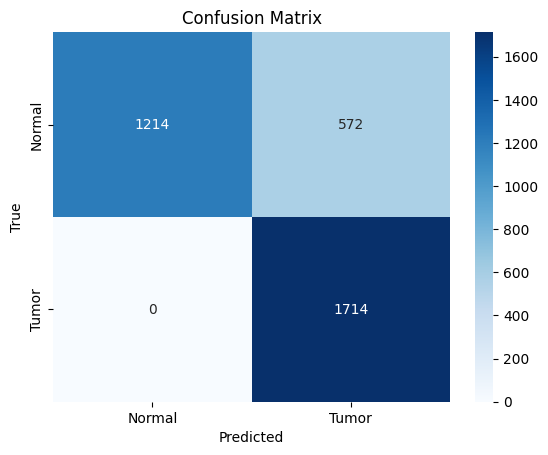

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers

# Define your model-building function
def build_model(hp):
    model = keras.Sequential()

    model.add(Conv2D(64, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    directory='hyperparameter_tuning',
    project_name='cnn_tuning'
)

# Perform the hyperparameter search
tuner.search(x_train, train_yCl, validation_data=(x_val, valid_yCl), epochs=3)

# Get the best model and hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

# Evaluate the best model on test data
test_score = best_model.evaluate(x_test, test_yCl)
print("Best Model Test Accuracy:", test_score[1])

# Display the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Display tuner results summary
tuner.results_summary()

Trial 3 Complete [00h 43m 27s]
val_accuracy: 0.9876922965049744

Best val_accuracy So Far: 1.0
Total elapsed time: 03h 31m 36s
110/110 [==============================] - 128s 1s/step - loss: 0.0012 - accuracy: 0.9991
Best Model Test Accuracy: 0.9991428852081299
Best Hyperparameters:
{'learning_rate': 0.00016307788288882075}
Results summary
Results in hyperparameter_tuning/cnn_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
learning_rate: 0.00016307788288882075
Score: 1.0

Trial 01 summary
Hyperparameters:
learning_rate: 0.0004808544647004281
Score: 1.0

Trial 02 summary
Hyperparameters:
learning_rate: 0.007476903660508061
Score: 0.9876922965049744
